In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12)

Define input points
Create 100 evenly spaced points between -5 and 5

In [2]:

X = np.linspace(-5, 5, 100).reshape(-1, 1)

Define the kernel function
here it is the RBF kernal

In [3]:

def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """
    Squared Exponential (RBF) kernel.
    Args:
        x1, x2 : input arrays
        length_scale : controls smoothness
        sigma_f : overall variance scale
    """
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)


In [4]:
length_scale = 1.0
sigma_f = 1.0

K = rbf_kernel(X, X, length_scale, sigma_f)

# Add a small jitter term for numerical stability (important for Cholesky)
K += 1e-6 * np.eye(len(X))

Cholesky decomposition

z ~ N(0,1) --> az ~ N(0,a**2)


PS: var(aX) = a^2 var(X)

In [5]:

L = np.linalg.cholesky(K)


Draw samples from the GP prior


In [6]:

n_samples = 3  # number of random functions to draw
f_prior = L @ np.random.randn(len(X), n_samples)

GP prior samples

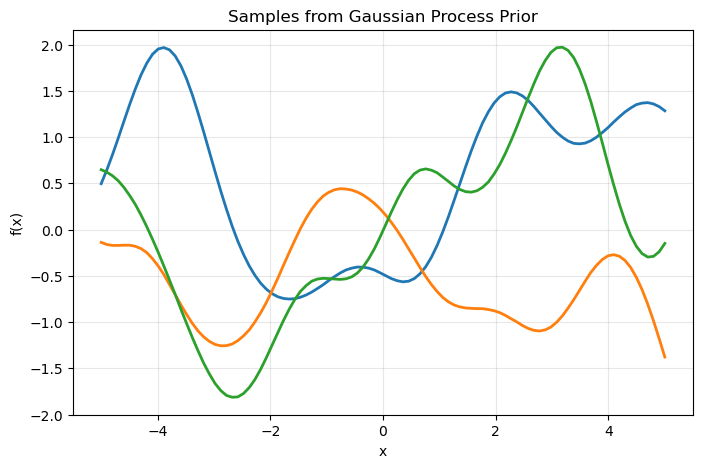

In [7]:

plt.figure(figsize=(8, 5))
plt.plot(X, f_prior, lw=2)
plt.title("Samples from Gaussian Process Prior")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.show()


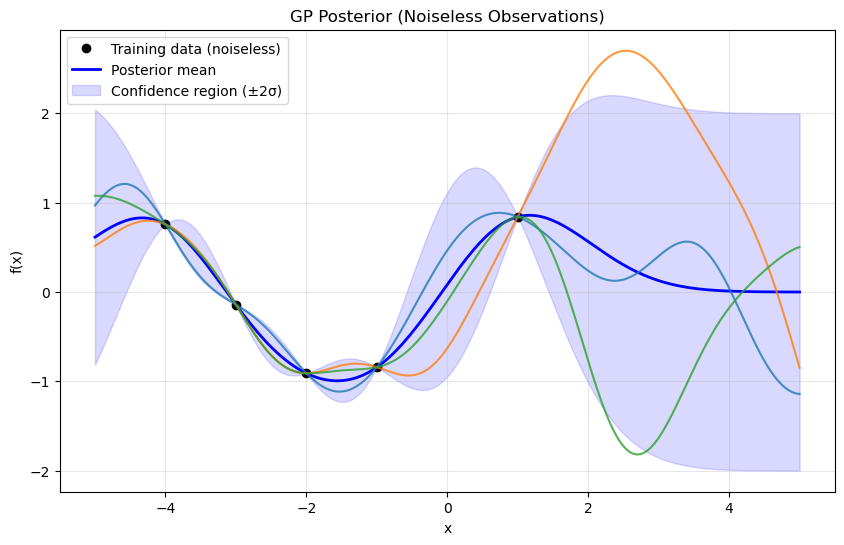

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
#Define RBF kernel

def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)


#  Training and test data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_train = np.sin(X_train)  # noiseless observations

X_test = np.linspace(-5, 5, 200).reshape(-1, 1)
#.Compute covariance matrices

length_scale = 1.0
sigma_f = 1.0
sigma_n = 0.0  # noiseless    

K = rbf_kernel(X_train, X_train, length_scale, sigma_f)
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

K_y = K + sigma_n**2 * np.eye(len(X_train))  # just K, since sigma_n=0

# ======================================
# 5. Posterior mean and covariance
# ======================================
L = np.linalg.cholesky(K_y)
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))

mu_s = K_s.T @ alpha
mu_s = mu_s.ravel()

v = np.linalg.solve(L, K_s)
cov_s = K_ss - np.dot(v.T, v)
cov_s = np.atleast_2d(cov_s)
std = np.sqrt(np.diag(cov_s))

 #Drawing samples from posterior

L_post = np.linalg.cholesky(cov_s + 1e-10*np.eye(len(X_test)))  # small jitter for stability
f_post = mu_s.reshape(-1, 1) + L_post @ np.random.randn(len(X_test), 3)


plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ko', label='Training data (noiseless)')
plt.plot(X_test, mu_s, 'b', lw=2, label='Posterior mean')
plt.fill_between(X_test.ravel(), mu_s - 2*std, mu_s + 2*std,
                 color='blue', alpha=0.15, label='Confidence region (±2σ)')
plt.plot(X_test, f_post, lw=1.5, alpha=0.8)
plt.title("GP Posterior (Noiseless Observations)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
